`penguins` is a pandas dataframe. The column "Species" contains the target variable. We extract the numerical columns that quantify some attributes of such animals and our goal is try to predict their species based on those attributes stored in the dataframe named `data`

In [2]:
import pandas as pd

penguins = pd.read_csv("../datasets/penguins.csv")

columns = ["Body Mass (g)", "Flipper Length (mm)", "Culmen Length (mm)"]
target_name = "Species"

# Remove lines with missing values for the columns of interest
penguins_non_missing = penguins[columns + [target_name]].dropna()

data = penguins_non_missing[columns]
target = penguins_non_missing[target_name]

(Adelie Penguin (Pygoscelis adeliae)          151
 Gentoo penguin (Pygoscelis papua)            123
 Chinstrap penguin (Pygoscelis antarctica)     68
 Name: Species, dtype: int64,
 <AxesSubplot: >,
 array(['Adelie Penguin (Pygoscelis adeliae)',
        'Gentoo penguin (Pygoscelis papua)',
        'Chinstrap penguin (Pygoscelis antarctica)'], dtype=object))

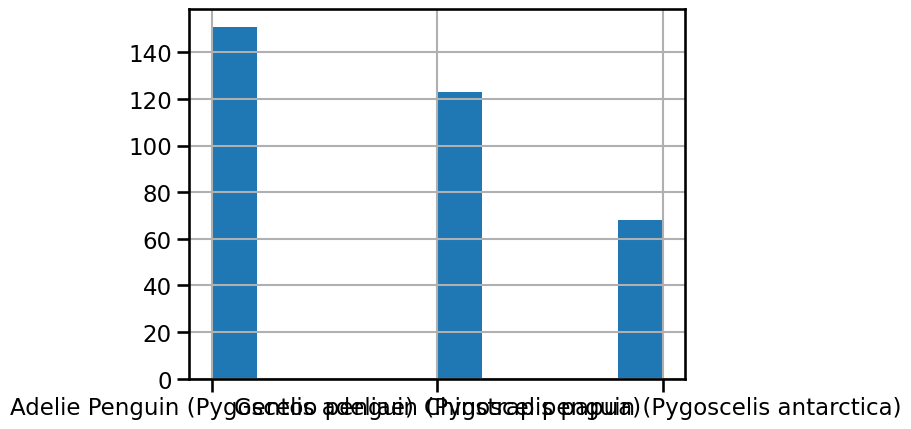

In [7]:
target.value_counts(), target.hist(), target.unique()

Inspect the statistics of the target and individual features

In [8]:
data.describe()

,Body Mass (g),Flipper Length (mm),Culmen Length (mm)
count,342.000000,342.000000,342.000000
mean,4201.754386,200.915205,43.921930
std,801.954536,14.061714,5.459584
min,2700.000000,172.000000,32.100000
25%,3550.000000,190.000000,39.225000
50%,4050.000000,197.000000,44.450000
75%,4750.000000,213.000000,48.500000
max,6300.000000,231.000000,59.600000


Let's now consider the following pipeline:

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[
    ("preprocessor", StandardScaler()),
    ("classifier", KNeighborsClassifier(n_neighbors=5)),
])

Evaluate the pipeline using stratified 10-fold cross-validation with the balanced-accuracy scoring metric to choose the correct statement in the list below.

You can use:

* `sklearn.model_selection.cross_validate` to perform the cross-validation routine;
* provide an integer 10 to the parameter cv of cross_validate to use the cross-validation with 10 folds;
* provide the string `"balanced_accuracy"` to the parameter scoring of cross_validate.

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

cv = StratifiedKFold(n_splits=10)

cv_results = cross_validate(model, data, target, cv=cv, scoring="balanced_accuracy")
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time  test_score
0  0.002002    0.002002    1.000000
1  0.002002    0.002002    1.000000
2  0.002001    0.002002    1.000000
3  0.002002    0.001001    0.918803
4  0.001001    0.002002    0.882540
5  0.002001    0.002002    0.952381
6  0.002002    0.001001    0.977778
7  0.002002    0.002002    0.930159
8  0.001001    0.002002    0.907937
9  0.002002    0.001001    0.952381
Accuracy score of our model:
0.952 ± 0.042


Repeat the evaluation by setting the parameters in order to select the correct statements in the list below.  
We recall that you can use `model.get_params()` to list the parameters of the pipeline and use `model.set_params(param_name=param_value)` to update them.  
Remember that one way to compare two models is comparing the cross-validation test scores of both models fold-to-fold, i.e. counting the number of folds where one model has a better test score than the other

In [13]:
model.get_params()

{'memory': None,
 'steps': [('preprocessor', StandardScaler()),
  ('classifier', KNeighborsClassifier())],
 'verbose': False,
 'preprocessor': StandardScaler(),
 'classifier': KNeighborsClassifier(),
 'preprocessor__copy': True,
 'preprocessor__with_mean': True,
 'preprocessor__with_std': True,
 'classifier__algorithm': 'auto',
 'classifier__leaf_size': 30,
 'classifier__metric': 'minkowski',
 'classifier__metric_params': None,
 'classifier__n_jobs': None,
 'classifier__n_neighbors': 5,
 'classifier__p': 2,
 'classifier__weights': 'uniform'}

In [15]:
model.set_params(classifier__n_neighbors=51)
cv_results = cross_validate(model, data, target, cv=cv, scoring="balanced_accuracy")
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time  test_score
0  0.002002    0.002002    0.952381
1  0.002002    0.002002    0.977778
2  0.002002    0.002002    1.000000
3  0.002001    0.003004    0.863248
4  0.002002    0.002002    0.882540
5  0.002001    0.002003    0.952381
6  0.002002    0.002001    0.955556
7  0.001001    0.002002    0.952381
8  0.003003    0.002001    0.930159
9  0.002003    0.002002    0.952381
Accuracy score of our model:
0.942 ± 0.041


In [16]:
model.set_params(classifier__n_neighbors=101)
cv_results = cross_validate(model, data, target, cv=cv, scoring="balanced_accuracy")
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time  test_score
0  0.002003    0.003003    0.857143
1  0.002002    0.002002    0.952381
2  0.002002    0.001001    0.944444
3  0.001001    0.002002    0.863248
4  0.002001    0.002003    0.834921
5  0.001001    0.002002    0.857143
6  0.003001    0.002002    0.834921
7  0.002003    0.002002    0.882540
8  0.002000    0.002003    0.834921
9  0.002002    0.002001    0.904762
Accuracy score of our model:
0.877 ± 0.044


In [17]:
model.set_params(
    classifier__n_neighbors=5,
    preprocessor__with_mean=False,
    preprocessor__with_std=False,
)
cv_results = cross_validate(model, data, target, cv=cv, scoring="balanced_accuracy")
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time  test_score
0  0.002001    0.002002    0.664683
1  0.002002    0.002002    0.736020
2  0.002003    0.001000    0.741026
3  0.002002    0.002001    0.704274
4  0.001002    0.002002    0.584127
5  0.002002    0.002002    0.669841
6  0.002002    0.002002    0.834921
7  0.002002    0.002001    0.742857
8  0.001001    0.002002    0.882540
9  0.002002    0.001000    0.838095
Accuracy score of our model:
0.740 ± 0.091


We will now study the impact of different preprocessors defined in the list below:

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


all_preprocessors = [
    None,
    StandardScaler(),
    MinMaxScaler(),
    QuantileTransformer(n_quantiles=100),
    PowerTransformer(method="box-cox"),
]

The Box-Cox method is common preprocessing strategy for positive values. The other preprocessors work both for any kind of numerical features. If you are curious to read the details about those method, please feel free to read them up in the preprocessing chapter of the scikit-learn user guide but this is not required to answer the quiz questions.

Use `sklearn.model_selection.GridSearchCV` to study the impact of the choice of the preprocessor and the number of neighbors on the stratified 10-fold cross-validated balanced_accuracy metric. We want to study the `n_neighbors` in the range `[5, 51, 101]` and preprocessor in the range `all_preprocessors`.

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_neighbors': (5, 51, 101),
    'preprocessor': all_preprocessors}
model_grid_search = GridSearchCV(model, param_grid=param_grid,
                                 n_jobs=2, cv=10)
model_grid_search.fit(data, target)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=2,
             param_grid={'classifier__n_neighbors': (5, 51, 101),
                         'preprocessor': [None, StandardScaler(),
                                          MinMaxScaler(),
                                          QuantileTransformer(n_quantiles=100),
                                          PowerTransformer(method='box-cox')]})

In [54]:
model_grid_search.get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__memory': None,
 'estimator__steps': [('preprocessor', StandardScaler()),
  ('classifier', KNeighborsClassifier())],
 'estimator__verbose': False,
 'estimator__preprocessor': StandardScaler(),
 'estimator__classifier': KNeighborsClassifier(),
 'estimator__preprocessor__copy': True,
 'estimator__preprocessor__with_mean': True,
 'estimator__preprocessor__with_std': True,
 'estimator__classifier__algorithm': 'auto',
 'estimator__classifier__leaf_size': 30,
 'estimator__classifier__metric': 'minkowski',
 'estimator__classifier__metric_params': None,
 'estimator__classifier__n_jobs': None,
 'estimator__classifier__n_neighbors': 5,
 'estimator__classifier__p': 2,
 'estimator__classifier__weights': 'uniform',
 'estimator': Pipeline(steps=[('preprocessor', StandardScaler()),
                 ('classifier', KNeighborsClassifier())]),
 'n_jobs': 2,
 'param_grid': {'classifier__n_neighbors': (5, 51, 101),
  'preprocessor': [None,
   StandardScaler(),
  

In [55]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__n_neighbors,param_preprocessor,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.001802,6.006082e-04,0.001802,4.003406e-04,5,StandardScaler(),"{'classifier__n_neighbors': 5, 'preprocessor':...",1.000000,1.000000,1.000000,0.941176,0.911765,0.970588,0.970588,0.941176,0.911765,0.970588,0.961765,0.032353,1
3,0.002302,4.587811e-04,0.001501,5.006075e-04,5,QuantileTransformer(n_quantiles=100),"{'classifier__n_neighbors': 5, 'preprocessor':...",0.971429,0.942857,1.000000,0.941176,0.941176,1.000000,0.970588,0.941176,0.911765,0.970588,0.959076,0.026888,2
2,0.001702,4.586926e-04,0.001401,4.903297e-04,5,MinMaxScaler(),"{'classifier__n_neighbors': 5, 'preprocessor':...",1.000000,0.971429,1.000000,0.970588,0.911765,0.941176,0.941176,0.970588,0.911765,0.970588,0.958908,0.030028,3
6,0.001601,4.903199e-04,0.001501,5.004645e-04,51,StandardScaler(),"{'classifier__n_neighbors': 51, 'preprocessor'...",0.971429,0.971429,1.000000,0.911765,0.911765,0.970588,0.941176,0.970588,0.941176,0.970588,0.956050,0.027209,4
4,0.003103,3.002405e-04,0.001802,4.003168e-04,5,PowerTransformer(method='box-cox'),"{'classifier__n_neighbors': 5, 'preprocessor':...",1.000000,0.971429,1.000000,0.911765,0.911765,0.970588,0.941176,0.941176,0.911765,1.000000,0.955966,0.035452,5
8,0.002102,3.002247e-04,0.001001,2.336015e-07,51,QuantileTransformer(n_quantiles=100),"{'classifier__n_neighbors': 51, 'preprocessor'...",0.914286,0.971429,1.000000,0.911765,0.941176,0.941176,0.970588,0.941176,0.941176,0.970588,0.950336,0.026181,6
7,0.001501,5.004645e-04,0.001602,4.903491e-04,51,MinMaxScaler(),"{'classifier__n_neighbors': 51, 'preprocessor'...",0.942857,0.971429,1.000000,0.911765,0.882353,0.970588,0.911765,0.970588,0.941176,0.941176,0.944370,0.033461,7
9,0.003103,3.003360e-04,0.001601,4.903491e-04,51,PowerTransformer(method='box-cox'),"{'classifier__n_neighbors': 51, 'preprocessor'...",0.942857,0.971429,1.000000,0.911765,0.882353,0.970588,0.911765,0.970588,0.941176,0.941176,0.944370,0.033461,7
11,0.001501,5.003930e-04,0.001601,4.903978e-04,101,StandardScaler(),"{'classifier__n_neighbors': 101, 'preprocessor...",0.914286,0.971429,0.970588,0.911765,0.882353,0.911765,0.882353,0.911765,0.882353,0.941176,0.917983,0.031780,9
12,0.001701,4.586822e-04,0.001602,4.903102e-04,101,MinMaxScaler(),"{'classifier__n_neighbors': 101, 'preprocessor...",0.914286,0.914286,0.970588,0.911765,0.882353,0.911765,0.823529,0.941176,0.882353,0.941176,0.909328,0.038287,10


In [56]:
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,n_neighbors,param_preprocessor,mean_test_score,std_test_score,rank_test_score
1,5,StandardScaler(),0.961765,0.032353,1
3,5,QuantileTransformer(n_quantiles=100),0.959076,0.026888,2
2,5,MinMaxScaler(),0.958908,0.030028,3
6,51,StandardScaler(),0.956050,0.027209,4
4,5,PowerTransformer(method='box-cox'),0.955966,0.035452,5
8,51,QuantileTransformer(n_quantiles=100),0.950336,0.026181,6
7,51,MinMaxScaler(),0.944370,0.033461,7
9,51,PowerTransformer(method='box-cox'),0.944370,0.033461,7
11,101,StandardScaler(),0.917983,0.031780,9
12,101,MinMaxScaler(),0.909328,0.038287,10


Evaluate the generalization performance of the best models found in each fold using nested cross-validation. Set `return_estimator=True` and `cv=10` for the outer loop. The scoring metric must be the `"balanced_accuracy"`.

In [60]:


cv_results = cross_validate(model_grid_search, data, target, cv=10, scoring="balanced_accuracy", return_estimator=True)
cv_results = pd.DataFrame(cv_results)
print(cv_results)
print(
    f"Accuracy score of our model:\n"
    f"{cv_results['test_score'].mean():.3f} ± "
    f"{cv_results['test_score'].std():.3f}"
)

   fit_time  score_time                                          estimator  \
0  0.299272    0.002002  GridSearchCV(cv=10,\n             estimator=Pi...   
1  0.281777    0.002002  GridSearchCV(cv=10,\n             estimator=Pi...   
2  0.276252    0.002002  GridSearchCV(cv=10,\n             estimator=Pi...   
3  0.279254    0.002002  GridSearchCV(cv=10,\n             estimator=Pi...   
4  0.279253    0.002002  GridSearchCV(cv=10,\n             estimator=Pi...   
5  0.280253    0.001001  GridSearchCV(cv=10,\n             estimator=Pi...   
6  0.282257    0.002002  GridSearchCV(cv=10,\n             estimator=Pi...   
7  0.280255    0.002002  GridSearchCV(cv=10,\n             estimator=Pi...   
8  0.282256    0.002002  GridSearchCV(cv=10,\n             estimator=Pi...   
9  0.281814    0.001001  GridSearchCV(cv=10,\n             estimator=Pi...   

   test_score  
0    0.952381  
1    0.926740  
2    1.000000  
3    0.863248  
4    0.882540  
5    1.000000  
6    0.955556  
7    0.930159

Explore the set of best parameters that the different grid search models found in each fold of the outer cross-validation.  
Remember that you can access them with the `best_params_` attribute of the estimator.

In [61]:
for cv_fold, estimator_in_fold in enumerate(cv_results["estimator"]):
    print(
        f"Best hyperparameters for fold #{cv_fold + 1}:\n"
        f"{estimator_in_fold.best_params_}"
    )

Best hyperparameters for fold #1:
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
Best hyperparameters for fold #2:
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
Best hyperparameters for fold #3:
{'classifier__n_neighbors': 5, 'preprocessor': StandardScaler()}
Best hyperparameters for fold #4:
{'classifier__n_neighbors': 51, 'preprocessor': StandardScaler()}
Best hyperparameters for fold #5:
{'classifier__n_neighbors': 51, 'preprocessor': StandardScaler()}
Best hyperparameters for fold #6:
{'classifier__n_neighbors': 5, 'preprocessor': QuantileTransformer(n_quantiles=100)}
Best hyperparameters for fold #7:
{'classifier__n_neighbors': 5, 'preprocessor': MinMaxScaler()}
Best hyperparameters for fold #8:
{'classifier__n_neighbors': 5, 'preprocessor': StandardScaler()}
Best hyperparameters for fold #9:
{'classifier__n_neighbors': 5, 'preprocessor': StandardScaler()}
Best hyperparameters for fold #10:
{'classifier__